# Wstęp

Project made during Big Data Laboratory course by Joanna Zawadzka and Krzysztof Blaut. A model has been created that allows the classification of the truthfulness of the article on the basis of the words contained in it. The data used to create the project comes from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

# Step 1. Libraries import

In [ ]:
!pip install openpyxl --upgrade --pre
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import nltk, re
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 2. Data upload. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
fake_news_file = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dane.xlsx", sheet_name="Fake", header=0)
true_news_file = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/dane.xlsx", sheet_name="True", header=0)

Mounted at /content/drive


# Step 3. Data exploration

([<matplotlib.patches.Wedge at 0x7fcc73ebb090>,
 [Text(-1.1984446032400653, 0.061078089072615305, 'True'),
  Text(1.1984446032400653, -0.06107808907261598, 'Fake')],
 [Text(-0.6990926852233714, 0.03562888529235892, '48.4%'),
  Text(0.6990926852233714, -0.035628885292359316, '51.6%')])

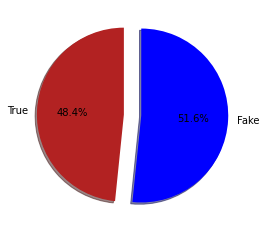

In [ ]:
all_news = fake_news_file.append(true_news_file, ignore_index=True) #Joining all data
label_size = [all_news['label'].sum(),len(all_news['label'])-all_news['label'].sum()]
plt.pie(label_size,labels=['True','Fake'], explode=[0.1,0.1],colors=['firebrick','blue'],startangle=90,shadow=True,autopct='%1.1f%%')

In [ ]:
all_news.head(-5)

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year'...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama's Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44257,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",1
44258,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,1
44259,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,1
44260,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,1


# Step 4. Titles and texts cleaning

In [ ]:
def clean_text(tekst):
    
    temp = re.sub("\s{2,}", " ", tekst)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("…", "", temp)  
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", "", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    
    return temp


In [ ]:
for i in range(len(all_news)):
  all_news['text'][i] = clean_text(all_news['text'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(all_news)):
  all_news['title'][i] = clean_text(all_news['title'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Step 5. Word cloud for all articles

In [ ]:
%matplotlib inline
def plot_cloud(wordcloud, title):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");
    plt.title(title, fontsize=35)

In [ ]:
articles_list = all_news.values.tolist()
listToStr = ' '.join([str(elem) for elem in articles_list])

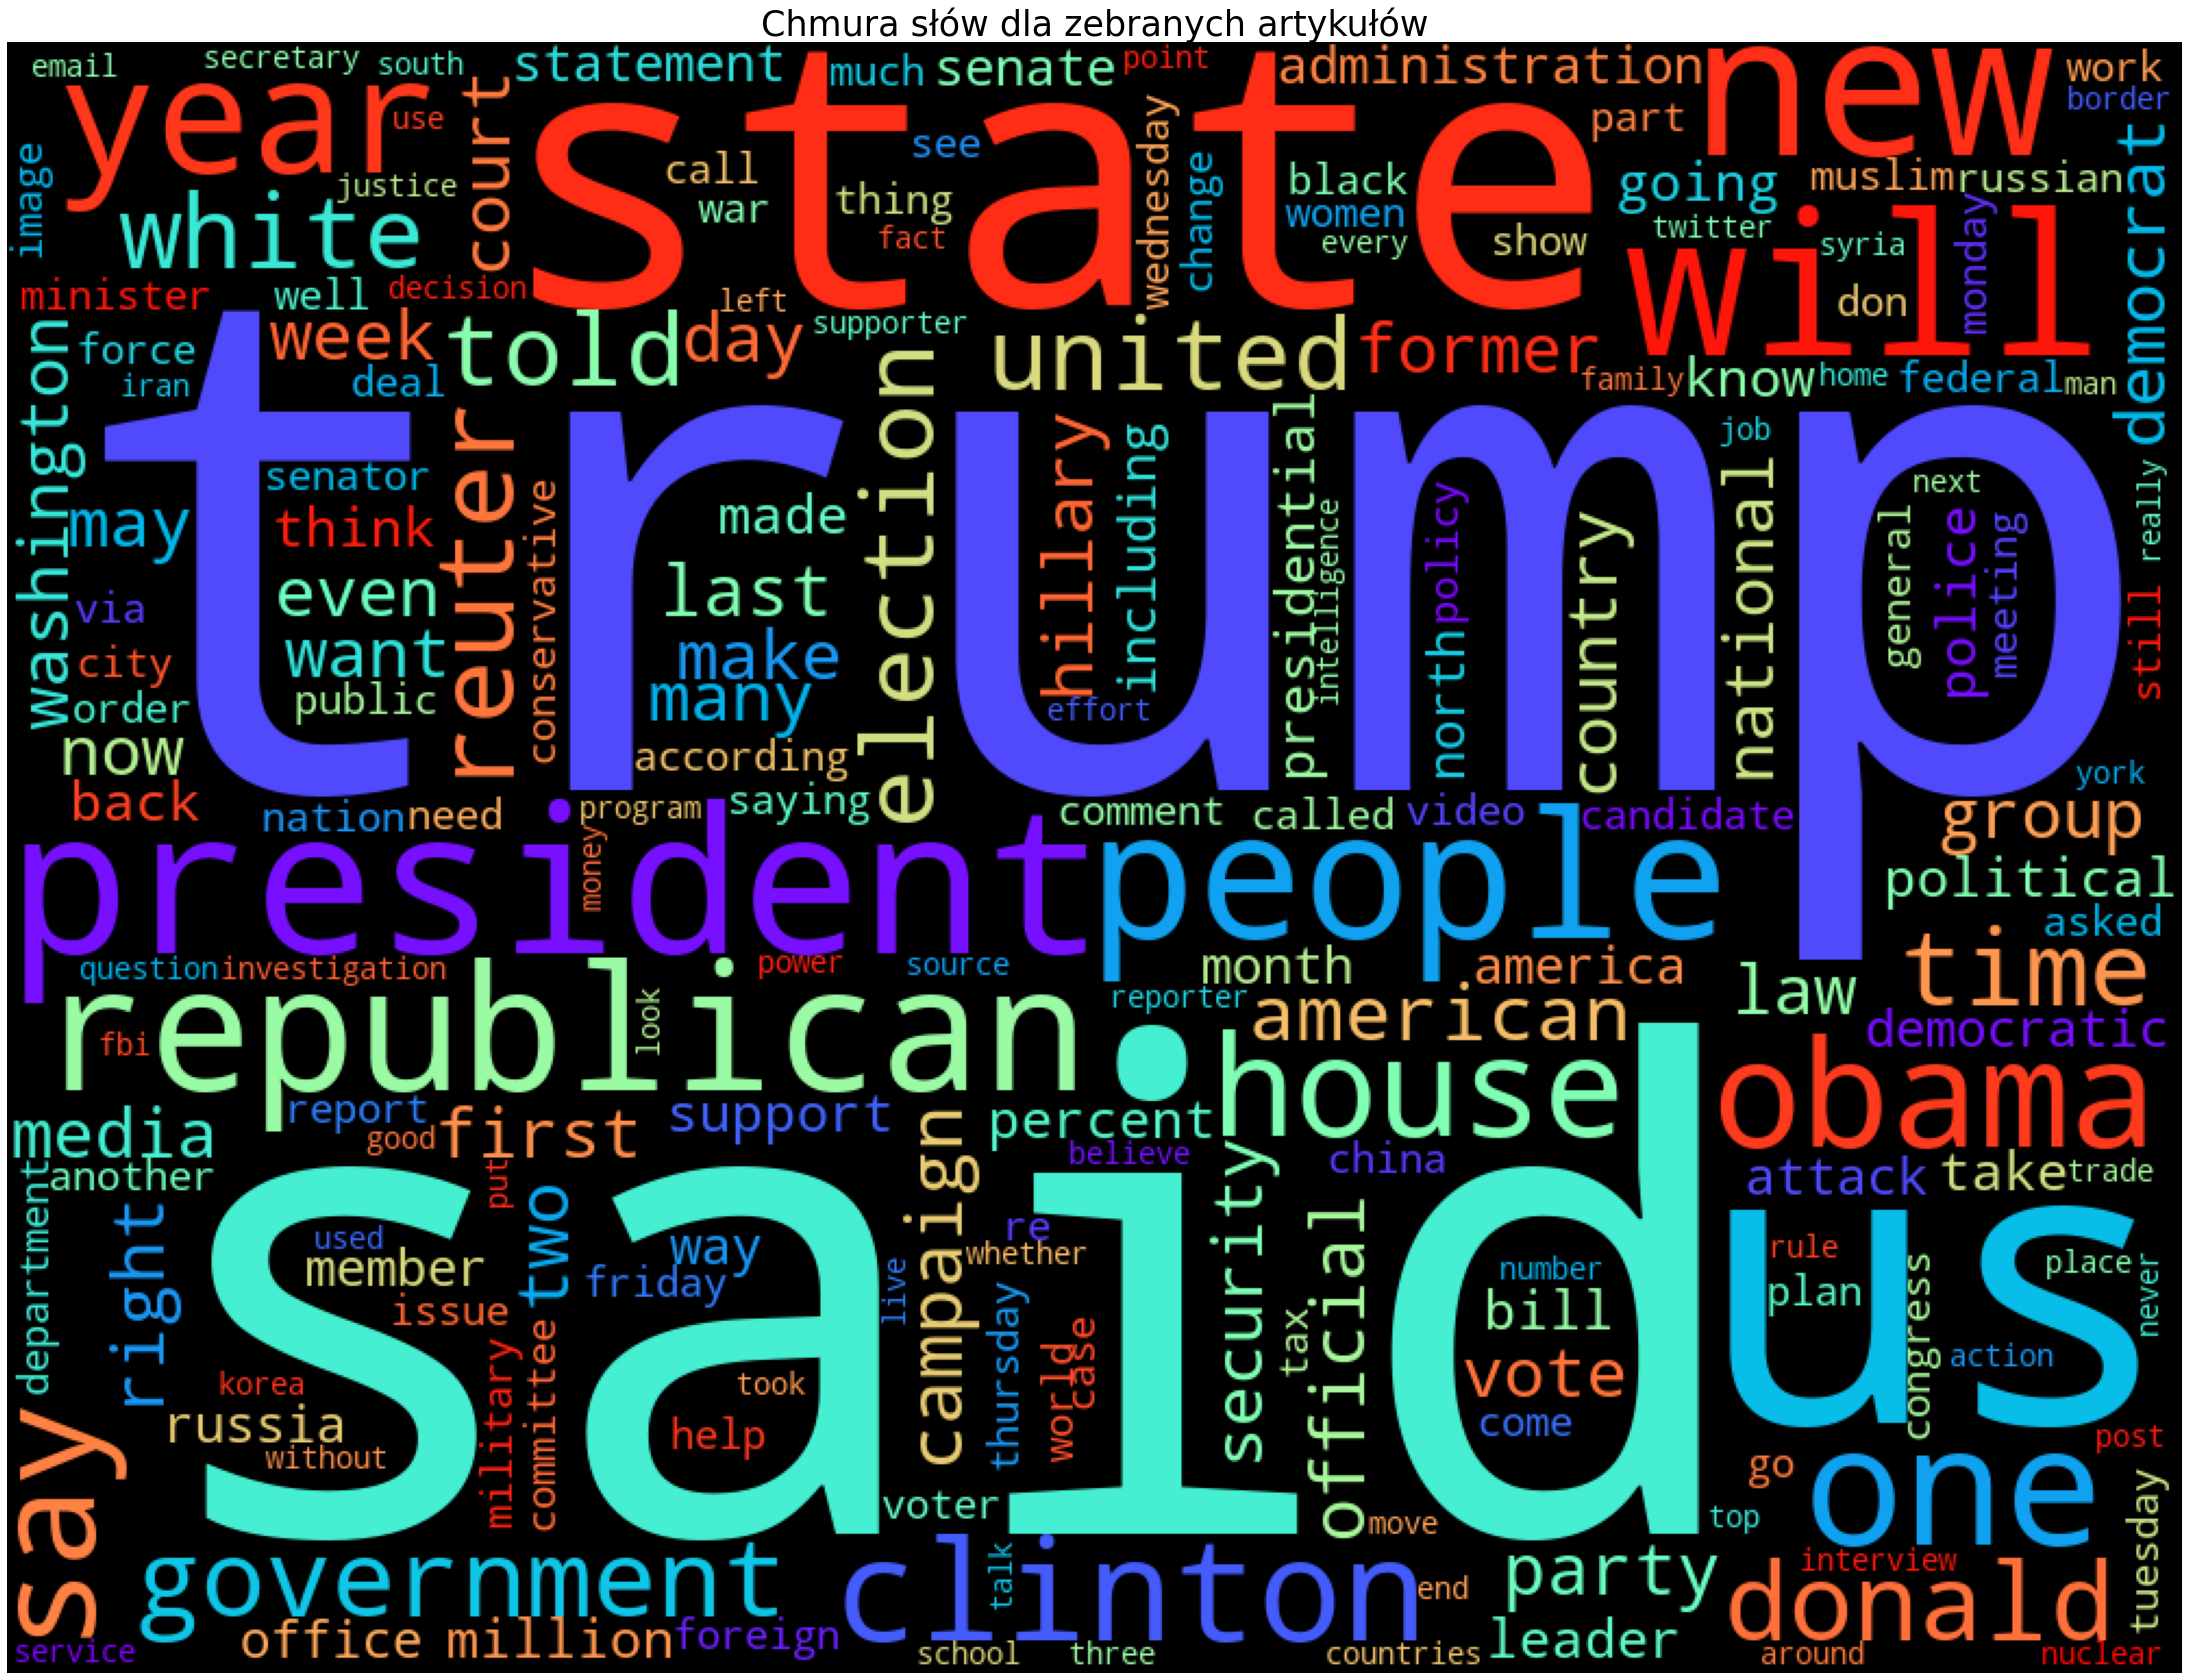

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 750, random_state=1, background_color='black', colormap='rainbow', collocations=False, stopwords = STOPWORDS).generate(listToStr)
plot_cloud(wordcloud, "Chmura słów dla zebranych artykułów")

# Step 6. Train set and test set split

In [ ]:
labels = all_news.label

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(all_news['text'], labels, test_size=0.2, random_state=10)

In [ ]:
label_size = [y_train.sum(),len(y_train) - y_train.sum()]
plt.pie(label_size,labels=['True','Fake'], explode=[0.1,0.1],colors=['firebrick','blue'],startangle=90,shadow=True,autopct='%1.1f%%')

In [ ]:
label_size = [y_test.sum(),len(y_test) - y_test.sum()]
plt.pie(label_size,labels=['True','Fake'], explode=[0.1,0.1],colors=['firebrick','blue'],startangle=90,shadow=True,autopct='%1.1f%%')

# Step 7. Creating model



In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.65%


In [ ]:
def findIfTrue (text):
  new_vector = tfidf_vectorizer.transform([text])
  y_pred1 = pac.predict(new_vector)
  return y_pred1[0]

In [ ]:
x = confusion_matrix(y_test,y_pred, labels=[0,1])

array([[4543,   18],
       [  13, 4280]])

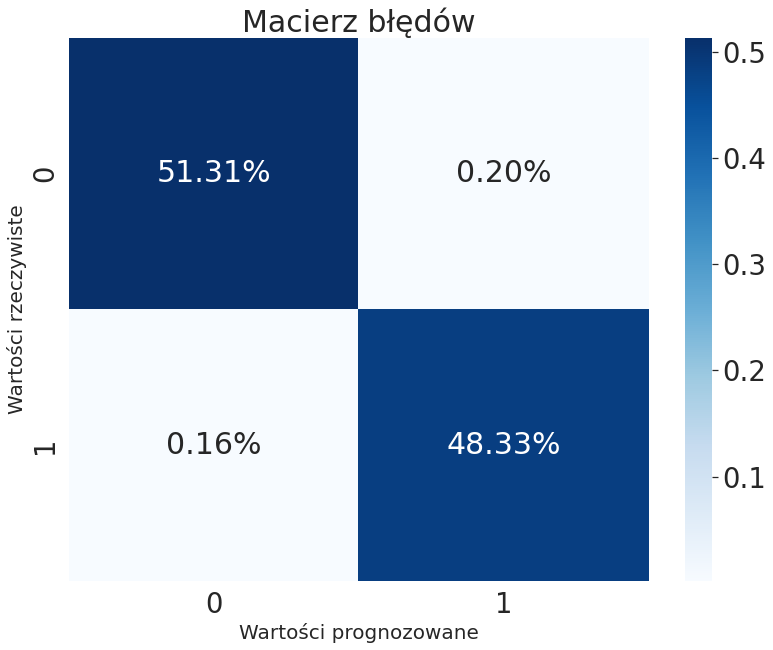

In [ ]:
labels = ['Prawdziwe Negatywne','Fałszywe Pozytywne','Fałszywe Negatywne','Prawdziwe Pozytywne']
categories = ['Fałszywe wiadomości', 'Prawdziwe wiadomości']
sns.set(rc = {'figure.figsize':(13,10)},
        font_scale=2.5)
sns.heatmap(x/np.sum(x), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title("Macierz błędów")
plt.xlabel("Wartości prognozowane", fontsize = 20)
plt.ylabel("Wartości rzeczywiste", fontsize = 20)
plt.show()

# Step 8. Model test

In [ ]:
findIfTrue("Billions of dollars. Seventeen Republican presidential contenders. Five Democratic presidential hopefuls, including a self-described democratic socialist. Two third-party candidates. The first female major party nominee. Fake news, campaigning by Twitter and a losing candidate who still got nearly three million more votes than the victor. It was a crazy year in American politics, and few could have predicted 2016 s even more remarkable conclusion: President-elect Donald Trump, who himself seemed somewhere between startled and stunned on Nov. 8 to be declared the winner over heavy favorite Hillary Clinton. While the political dust is far from settled, the bizarre campaign season upended numerous assumptions about American politics, parties, voters and the very democratic process underlying it all. Was this the year that changed elections forever – along with the industry supporting them? Or was 2016 an outlier year, with an outlier candidate propelled by a unique perfect storm of voter anger, an anti-establishment mood and a parade of unusually unlikeable candidates?")

0